In [1]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

##Data 준비 - Sin data로 학습 진행


In [3]:
#Data 준비
def get_sin_data(start=0, end=10, step=0.1):
   x = np.arange(start, end, step)
   np.random.shuffle(x)
   y = np.sin(x)

   split_index=int(x.shape[0]*0.6)

   train_x, test_x=x[:split_index], x[split_index:]
   train_y, test_y=y[:split_index], y[split_index:]

   return (train_x, train_y), (test_x, test_y)

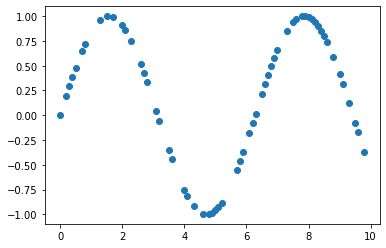

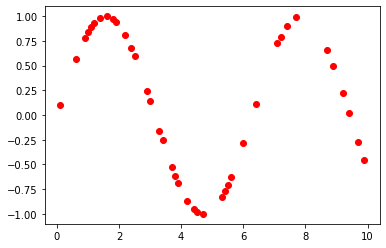

In [4]:
(train_x, train_y), (test_x, test_y)=get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x, train_y)
plt.show()

plt.scatter(test_x, test_y, color='r')
plt.show()

##실습용 DNN 최소코드

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 4.363752841949463
40/40 [==============================] - 0s 418us/sample - loss: 0.1661 - mean_squared_error: 0.1661
loss= 0.1661244213581085
mse= 0.16612442


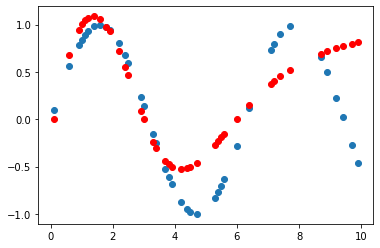

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

#모델정의
model=keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh')) 
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model.summary()

#학습 & 시간표시
start_time=time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print('elapsed : {}'.format(time.time()-start_time))

#평가
loss,mse=model.evaluate(test_x, test_y)
print('loss=', loss)
print('mse=', mse)

#예측
y_=model.predict(test_x)

#출력
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r') #예측값을 빨간색으로 출력
plt.show()

##학습 반복

반복학습을 위한 함수 정의

In [7]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)

반복학습 실행 (10번 반복)

0 times fitting
elapsed : 4.5429089069366455


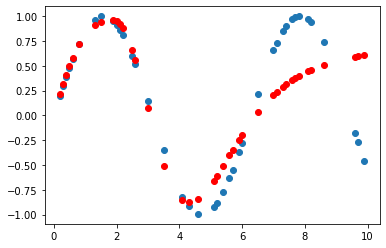

1 times fitting
elapsed : 4.421842098236084


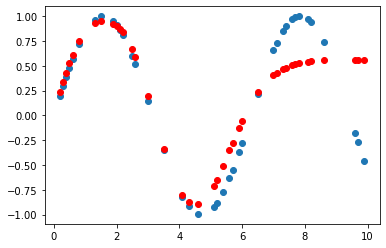

2 times fitting
elapsed : 4.387633800506592


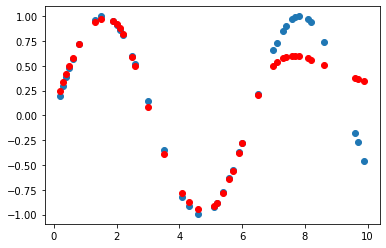

3 times fitting
elapsed : 4.594708442687988


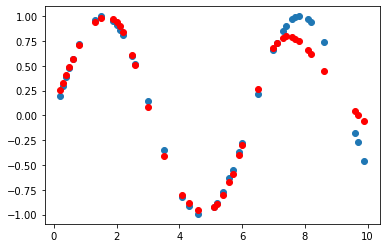

4 times fitting
elapsed : 4.5757832527160645


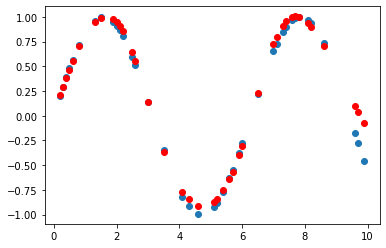

5 times fitting
elapsed : 4.520076513290405


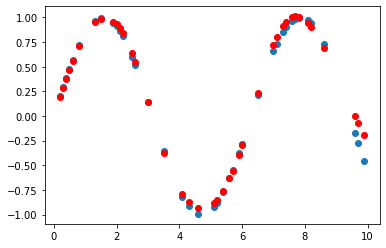

6 times fitting
elapsed : 4.637247562408447


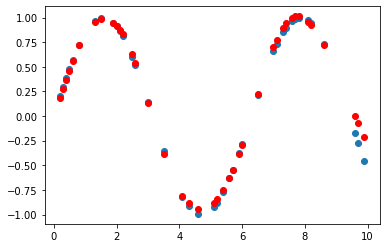

7 times fitting
elapsed : 4.569008827209473


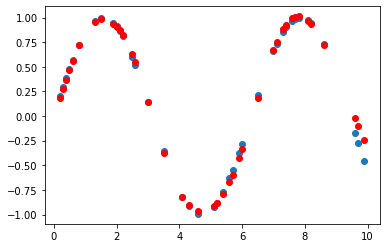

8 times fitting
elapsed : 4.5820841789245605


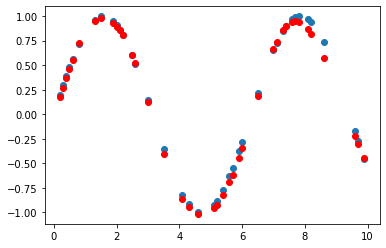

9 times fitting
elapsed : 4.752021551132202


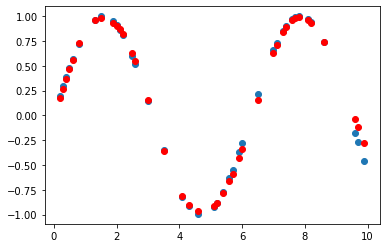

In [ ]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

##Batch size 변화

In [8]:
def build_model():

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [9]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

Batch size 적용 [1,2,5,10,20,50,100,200,500]

batch_size=1
elapsed : 50.75346302986145


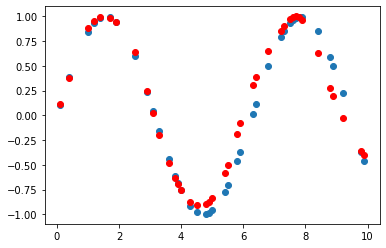

batch_size=2
elapsed : 28.796746253967285


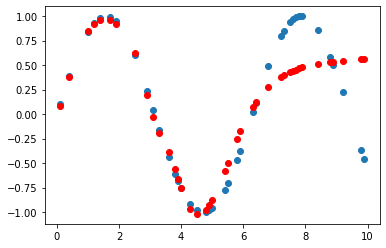

batch_size=5
elapsed : 12.190746068954468


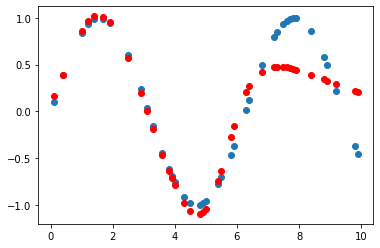

batch_size=10
elapsed : 7.210759401321411


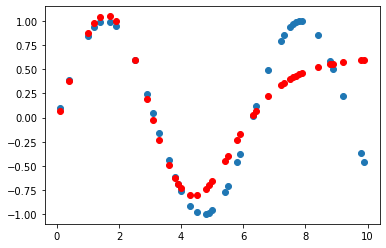

batch_size=20
elapsed : 4.073648691177368


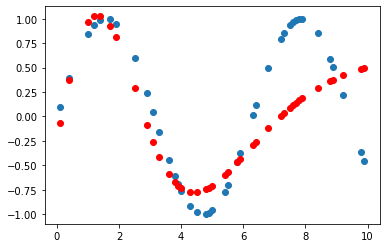

batch_size=50
elapsed : 3.1829097270965576


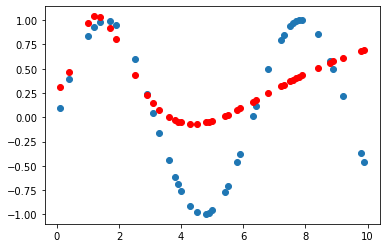

batch_size=100
elapsed : 2.2260820865631104


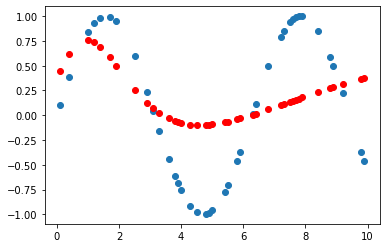

batch_size=200
elapsed : 2.291594982147217


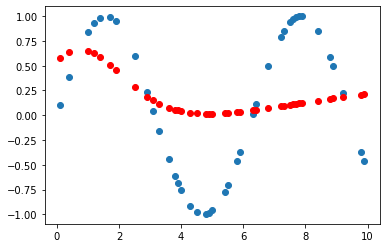

batch_size=500
elapsed : 2.4039669036865234


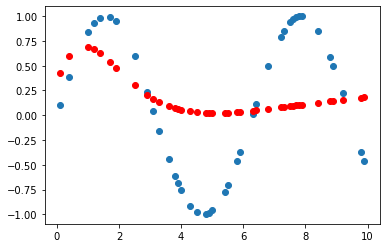

In [10]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

##History의 Loss 값 추이를 통한 Overfitting 확인
반환된 history의 loss로 진행상황을 확인함

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 4.497727155685425


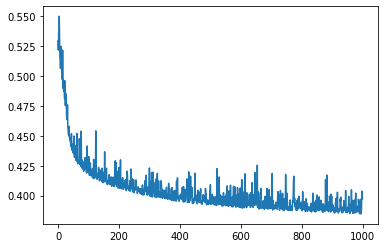

In [11]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

plt.plot(history.history['loss'])

학습시 validation - model.fit()의 validation_data 출력

In [12]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=20, validation_data=(test_x, test_y))
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Train on 60 samples, validate on 40 samples
Epoch 1/1000
60/60 [==============================] - 0s 4ms/sample - loss: 0.6321 - mean_squared_error: 0.6321 - val_loss: 0.5405 - val_mean_squared_error: 0.5405
Epoch 2/1000
60/60 [==============================] - 0s 190us/sample - loss: 0.4531 - mean_squared_error: 0.4531 - val_loss: 0.4888 - val_mean_squared_error: 0.4888
Epoch 3/100

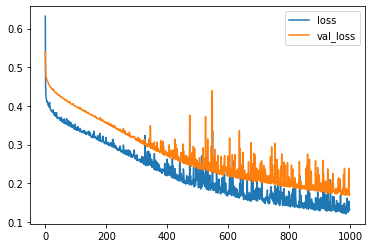

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

##model.fit()의 Validation_split 옵션
model.fit()에서 validation_split 옵션을 이용해서 test data로 준것의 일부를 validation에 사용하도록 설정  
validation에 사용된 data는 학습에 사용되지 않음

In [14]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.890994548797607


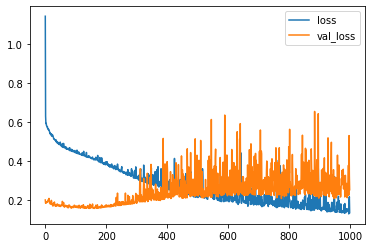

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

##Data 크기 vs epoch 수의 영향
data 크기 100배 증가  
epoch 수를 1000번에서 5번으로 감소해도 학습이 잘됨

In [17]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))  

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 - 3s - loss: 0.2765 - mean_squared_error: 0.2765
Epoch 2/5
60000/60000 - 3s - loss: 0.1062 - mean_squared_error: 0.1062
Epoch 3/5
60000/60000 - 3s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 4/5
60000/60000 - 3s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 5/5
60000/60000 - 3s - loss: 0.0210 - mean_squared_error: 0.0210
elapsed

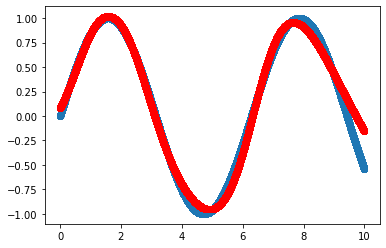

In [18]:
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()


##Shuffle - data 편향 방지를 통한 학습 향상

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_43 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.1278762817382812


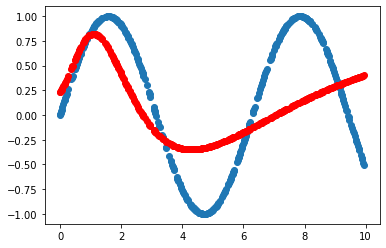

In [19]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
#history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True) #This should be tested
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

##Shuffled data 준비

shuffle 되지 않은 data로 학습하는 경우

600


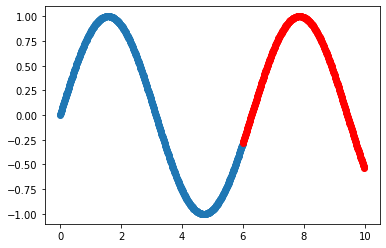

In [20]:
#DATA 준비
x = np.arange(0,10,0.01)
# np.random.shuffle(x) # COMMENTED
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_46 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.191728115081787


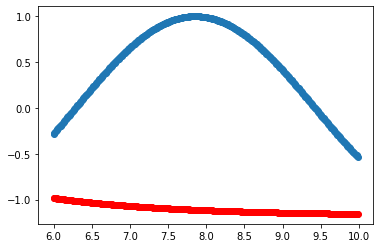

In [21]:
#학습
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

Shuffle된 data로 학습하는 경우

600


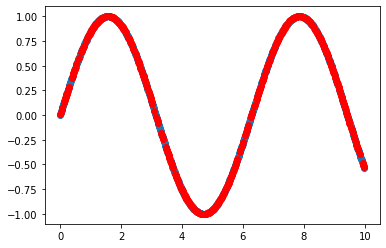

In [22]:
#DATA 준비
x = np.arange(0,10,0.01)
np.random.shuffle(x) # UNCOMMENT
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_49 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.245638847351074


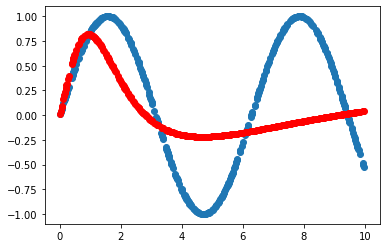

In [23]:
#학습
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

##Normalization/standardization   
입력이 여러 차원일 때 각 차원의 입력을 동일한 스케일로 맞춰주면 학습이 빨라짐  
본 실습 데이터로는 그런 효과가 보여지지 않고 오히려 학습이 저하됨  
Normalization 하는 방법/예로만 참고

###Before Normalization

min= -10.0
max= 9.899999999999928


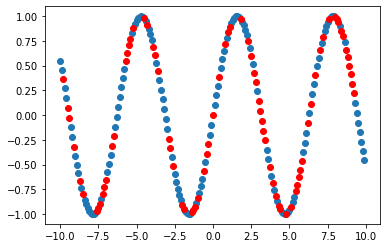

In [24]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=-10, end=10, step=0.1)

print("min=",np.min(train_x))
print("max=",np.max(train_x))

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

###Batch Normalization

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_55 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.230056762695312
80/80 [==============================] - 0s 1ms/sample - loss: 0.2470 - mean_squared_error: 0.2470
loss= 0.24696613550186158
mse= 0.24696612


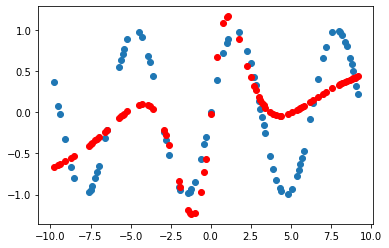

In [26]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 10)                20        
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_61 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 11        
Total params: 181
Trainable params: 161
Non-trainable params: 20
_________________________________________________________________
elapsed : 9.731405973434448
80/80 [==============================] - 0s 2ms/sample - loss: 0.3211 - mean_squared_error: 0.3211
loss= 0.32113468647003174
mse= 0.3211347


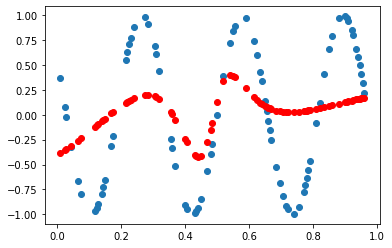

In [29]:
from tensorflow.keras.layers import BatchNormalization

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(BatchNormalization())
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

###After Normalization

min= 0.0
max= 0.9949999999999963


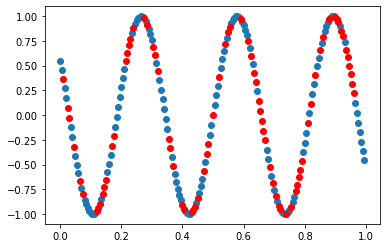

In [27]:
min = -10 # ADDED
max = 10 # ADDED

train_x = (train_x-min)/(max-min) # ADDED
test_x = (test_x-min)/(max-min) # ADDED

print("min=",np.min(train_x))
print("max=",np.max(train_x))

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_58 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.275115966796875
80/80 [==============================] - 0s 1ms/sample - loss: 0.4426 - mean_squared_error: 0.4426
loss= 0.44260373711586
mse= 0.44260374


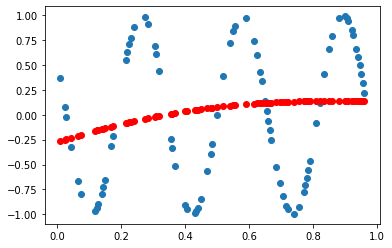

In [28]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()